In [1]:
from ghz import create_circuit
from qiskit.visualization import plot_distribution
from backends import qw_contralto, ibm_5q, ibm_127q
from noise_models import qe_noise_model, th_noise_model, ro_noise_model
from qiskit import transpile

/Users/stefan.kister/opt/virtual/quiskit_v10x/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
num_qubits = 4
ghz = create_circuit(num_qubits)

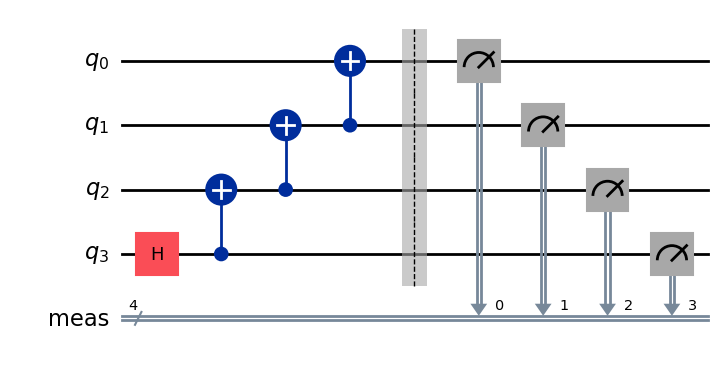

In [3]:
ghz.draw('mpl')

In [4]:
backend = ibm_5q()

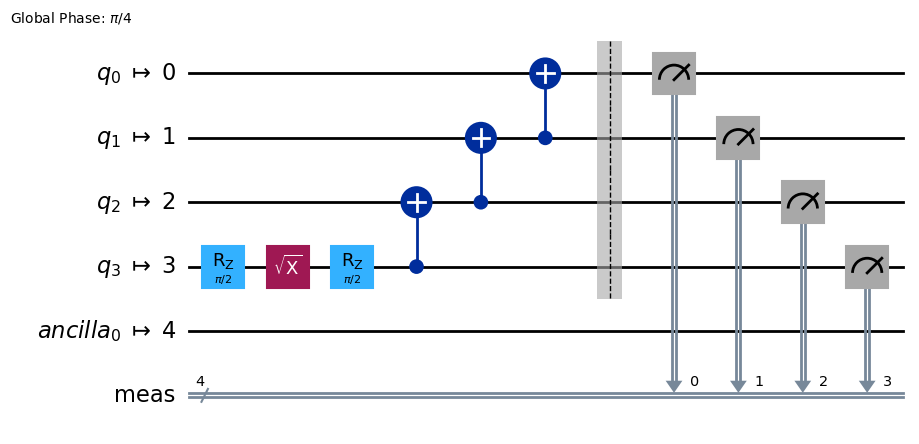

In [5]:
ghz_trans = transpile(ghz, backend, optimization_level=1)

ghz_trans.draw('mpl')


In [6]:
job = backend.run(ghz_trans, shots=8000)
result = job.result()
counts=result.get_counts()
print(counts)

{'1001': 7, '0101': 8, '1010': 37, '1011': 147, '1111': 2656, '1101': 92, '1110': 800, '1000': 70, '0010': 38, '0000': 3689, '1100': 49, '0100': 48, '0110': 35, '0011': 10, '0001': 201, '0111': 113}


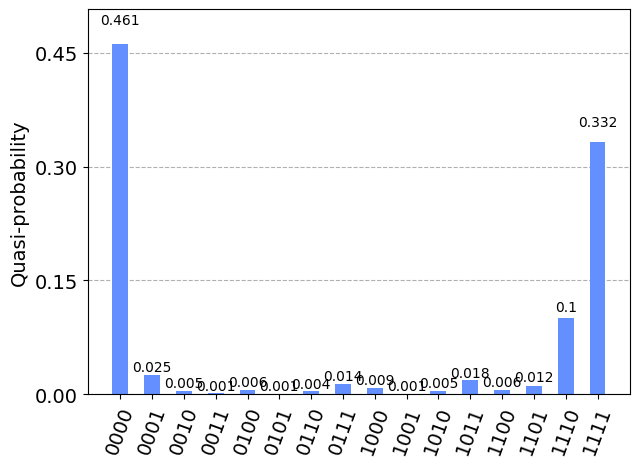

In [7]:
plot_distribution(counts)

In [8]:
# Defining Quantum Error Noise Model
# Depolarization Error
q1_gate_err = 0.01
q2_gate_err = 0.01

# Pauli Error
reset_error = 0.05
meas_error = 0.05
gate1_error = 0.01

qe_nm = qe_noise_model(q1_gate_err,q2_gate_err, reset_error, meas_error, gate1_error)


In [9]:
job = backend.run(ghz_trans, noise_model=qe_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Quantum Error Noise Model")
print(counts)

GHZ with Quantum Error Noise Model
{'0110': 19, '1100': 16, '0100': 164, '1110': 169, '1010': 20, '0101': 14, '0011': 23, '0001': 196, '1011': 172, '1101': 186, '1111': 3221, '0111': 173, '1001': 18, '1000': 189, '0010': 167, '0000': 3253}


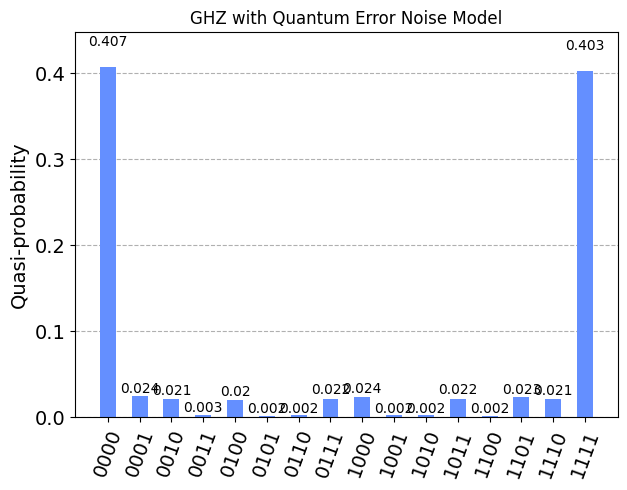

In [10]:
plot_distribution(counts, title="GHZ with Quantum Error Noise Model")

In [11]:
# Defining Thermal Noise Model
import numpy as np

# T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, 4) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(70e3, 10e3, 4)  # Sampled from normal distribution mean 50 microsec

# Approximate instruction times (in nanoseconds) from QM data & discussion with Max
time_u1 = 0   # virtual gate
time_u2 = 16  # (single X90 pulse)
time_u3 = 32 # (two X90 pulses)
time_cx = 40
time_reset = 1216  # Feedback, measurement and conditional pulse
time_measure = 1000 # 1 microsecond

th_nm = th_noise_model(num_qubits, T1s, T2s, time_u1, time_u2, time_u3, time_cx, time_reset, time_measure)

In [12]:
job = backend.run(ghz_trans, noise_model=th_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Thermal Noise Model")
print(counts)

GHZ with Thermal Noise Model
{'1001': 1, '0110': 1, '0101': 2, '1011': 77, '0111': 116, '1111': 3701, '1000': 3, '1100': 1, '1110': 71, '1101': 67, '0000': 3960}


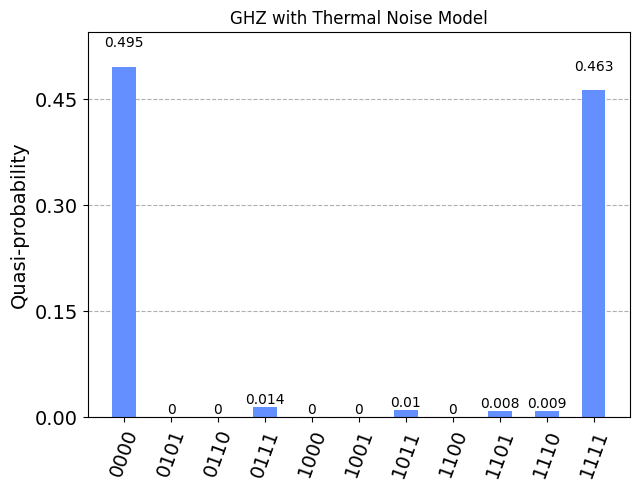

In [13]:
plot_distribution(counts, title="GHZ with Thermal Noise Model")

In [14]:
# Define Readout Noise Model
# Readout Error
p0given1 = 0.05
p1given0 = 0.05

ro_nm = ro_noise_model(p0given1,p1given0)

In [15]:
job = backend.run(ghz_trans, noise_model=ro_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Thermal Noise Model")
print(counts)

GHZ with Thermal Noise Model
{'0101': 16, '1001': 19, '1010': 20, '0110': 11, '1111': 3259, '1101': 187, '1000': 174, '1110': 165, '0011': 19, '0001': 172, '1100': 9, '0100': 171, '1011': 175, '0111': 151, '0010': 144, '0000': 3308}


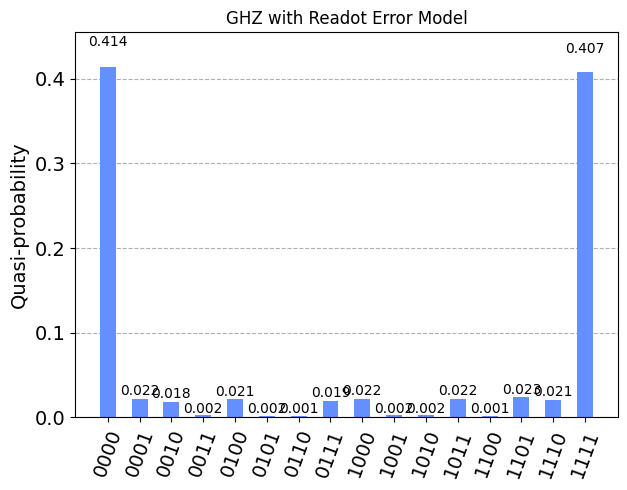

In [17]:
plot_distribution(counts, title="GHZ with Readot Error Model")